deep NN for Mnist : accuracy about 98%

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost = 0.285332552
Epoch: 0002 cost = 0.101540083
Epoch: 0003 cost = 0.067855325
Epoch: 0004 cost = 0.052638687
Epoch: 0005 cost = 0.042107093
Epoch: 0006 cost = 0.034162816
Epoch: 0007 cost = 0.030016249
Epoch: 0008 cost = 0.026983329
Epoch: 0009 cost = 0.021476106
Epoch: 0010 cost = 0.018336871
Epoch: 0011 cost = 0.021907002
Epoch: 0012 cost = 0.018091819
Epoch: 0013 cost = 0.015241065
Epoch: 0014 cost = 0.016981512
Epoch: 0015 cost = 0.014745160
Learning Finished!
Accuracy: 0.9806
Label:  [3]
Prediction:  [3]


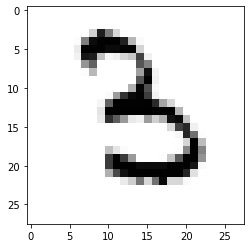

In [0]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777) 
tf.reset_default_graph() #변수 초기화
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

learning_rate = 0.001
training_epochs = 15
batch_size = 100

x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

w1 = tf.get_variable("W1", shape=[784, 512], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
l1 = tf.nn.relu(tf.matmul(x, w1) + b1)

w2 = tf.get_variable("W2", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
l2 = tf.nn.relu(tf.matmul(l1, w2) + b2)

w3 = tf.get_variable("W3", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
l3 = tf.nn.relu(tf.matmul(l2, w3) + b3)

w4 = tf.get_variable("W4", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
l4 = tf.nn.relu(tf.matmul(l3, w4) + b4)

w5 = tf.get_variable("W5", shape=[512, 10], initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(l4, w5) + b5

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {x: batch_xs, y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels}))

r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(tf.argmax(hypothesis, 1), feed_dict={x: mnist.test.images[r:r + 1]}))

plt.imshow(mnist.test.images[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

Dropout for Mnist : accuracy about 98%

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Epoch: 0001 cost = 0.468181754
Epoch: 0002 cost = 0.171730907
Epoch: 0003 cost = 0.134743540
Epoch: 0004 cost = 0.107841795
Epoch: 0005 cost = 0.094697727
Epoch: 0006 cost = 0.084637463
Epoch: 0007 cost = 0.071893265
Epoch: 0008 cost = 0.068645823
Epoch: 0009 cost = 0.062672714
Epoch: 0010 cost = 0.058570361
Epoch: 0011 cost = 0.055290651
Epoch: 0012 cost = 0.052368859
Epoch: 0013 cost = 0.049783039
Epoch: 0014 cost = 0.046086985
Epoch: 0015 cost = 0.043517363
Learning Finished!
Accuracy: 0.9806
Label:  [6]
Prediction:  [6]


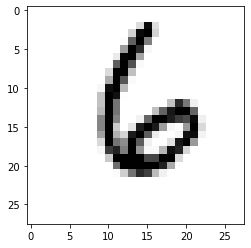

In [0]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)
tf.reset_default_graph() #변수 초기화

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

learning_rate = 0.001
training_epochs = 15
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

keep_prob = tf.placeholder(tf.float32)

w1 = tf.get_variable("W1", shape=[784, 512], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
l1 = tf.nn.relu(tf.matmul(x, w1) + b1)
l1 = tf.nn.dropout(l1, keep_prob=keep_prob)

w2 = tf.get_variable("W2", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
l2 = tf.nn.relu(tf.matmul(l1, w2) + b2)
l2 = tf.nn.dropout(l2, keep_prob=keep_prob)

w3 = tf.get_variable("W3", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
l3 = tf.nn.relu(tf.matmul(l2, w3) + b3)
l3 = tf.nn.dropout(l3, keep_prob=keep_prob)

w4 = tf.get_variable("W4", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
l4 = tf.nn.relu(tf.matmul(l3, w4) + b4)
l4 = tf.nn.dropout(l4, keep_prob=keep_prob)

w5 = tf.get_variable("W5", shape=[512, 10], initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(l4, w5) + b5

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs):
    avg_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {x: batch_xs, y: batch_ys, keep_prob: 0.7}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels, keep_prob: 1}))

r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(tf.argmax(hypothesis, 1), feed_dict={x: mnist.test.images[r:r + 1], keep_prob: 1}))

plt.imshow(mnist.test.images[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()